### **Estructurando un proyecto de DS (Parte l)**

Descripcion breve del dataset:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from scipy import stats
from math import nan, isnan
from scipy.stats import norm


url = 'https://github.com/Nemo-sop/CoderHouse-DataScience/blob/main/Ranked%20Games%20AoE2.csv?raw=true'
df = pd.read_csv(url,index_col=0, encoding = "ISO-8859-1")

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

df.head()
df.columns

Index(['started', 'finished', 'map_type', 'steam_id.win', 'name.win',
       'country.win', 'rating.win', 'rating_change.win', 'civ.win',
       'color.win', 'steam_id.lose', 'name.lose', 'country.lose',
       'rating.lose', 'rating_change.lose', 'civ.lose', 'color.lose',
       'map_type.name', 'civ.lose.name', 'civ.win.name', 'matchup',
       'duration'],
      dtype='object')

5 Preguntas a responder a partir de los datos:


1) Cual es la civilizacion mas competitiva?

2) Cual es la distribucion de duracion de las partidas? 

3) Cual es la civilizacion mas usada en determinado pais?

4) Distribucion del rating de los jugadores en cada pais

5) Que mapas son los mas usados en determinado pais?

## **Cual es la civilizacion mas competitiva**

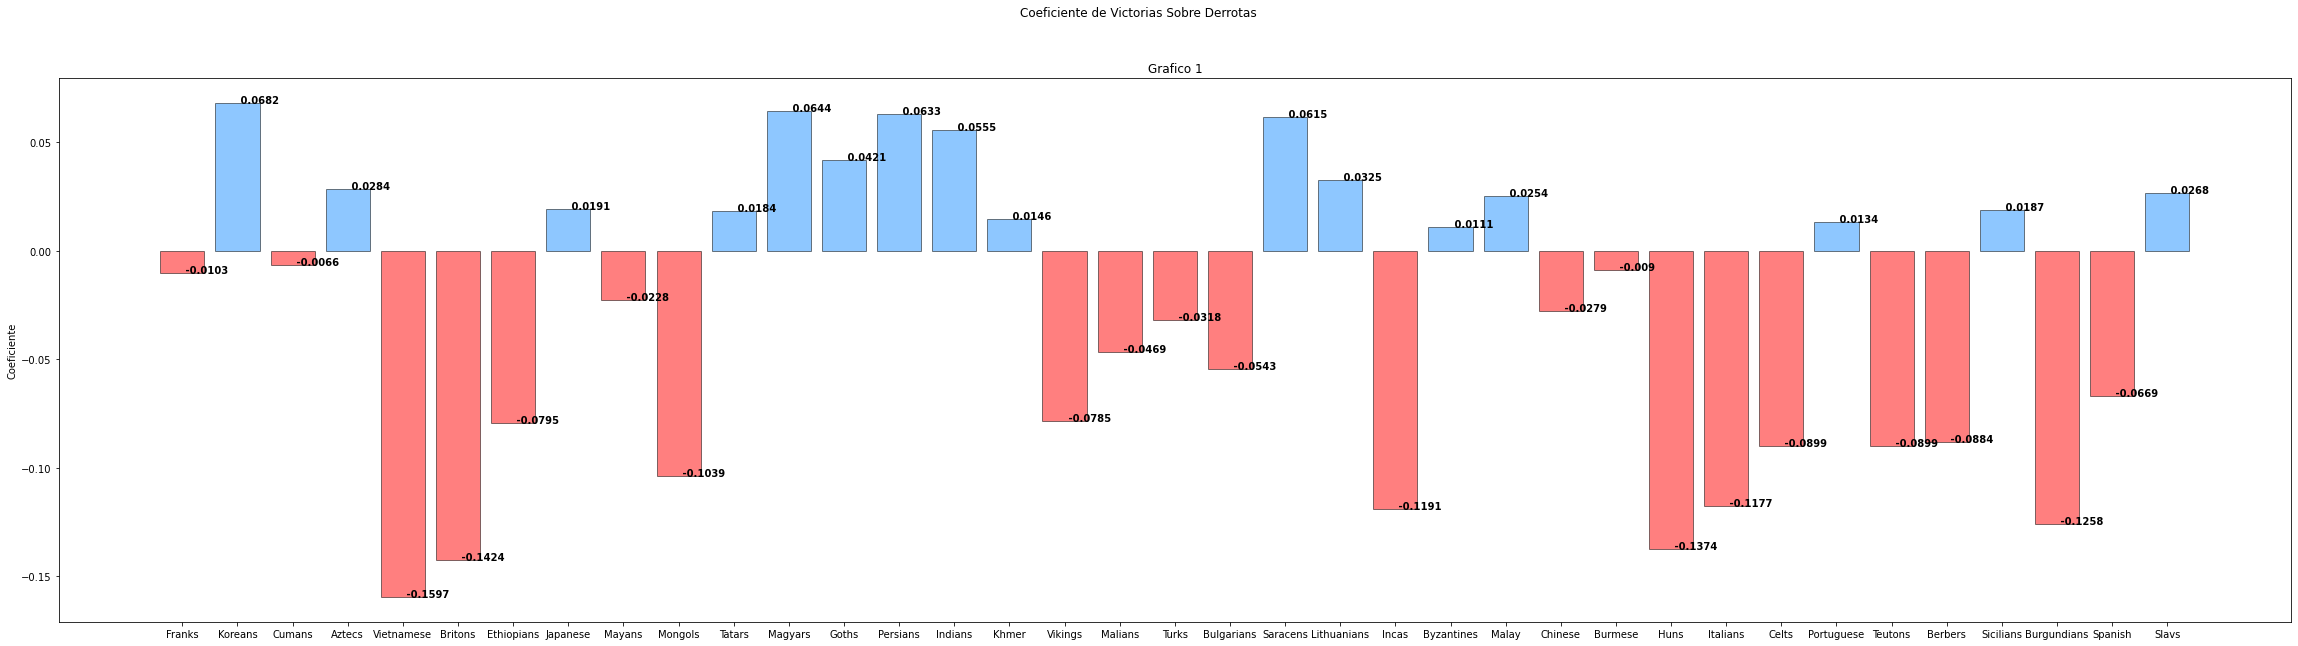

In [ ]:
# Cual es la civilizacion mas competitiva

# El mapa mas popular para realizar partidas competitivas es Arabia por una convencion no escrita popular, pero si queresmoas podemos cambiar esto
mapa = "Arabia"

df.rename(columns = {'civ.win.name':'civ_win_name', 'civ.lose.name':'civ_lose_name', 'map_type.name':'map_type_name', 'civ.lose':'civ_lose', 'civ.win':'civ_win'}, inplace = True)

#obtener todas las civilizaciones jugadas
ganadoras =  df["civ_win_name"][df.map_type_name == mapa]
perdedoras = df["civ_lose_name"][df.map_type_name == mapa]
civilizaciones = list(pd.concat([ganadoras,perdedoras],axis=0).unique())

#obtener cuantas veces se uso cada civilizacion
victorias = ganadoras.value_counts()
derrotas = perdedoras.value_counts()
jugadas = victorias + derrotas

coef = round((victorias - derrotas)/jugadas,4)


# Graficamos la respuesta
fig , ax = plt.subplots(figsize=(40, 10))
plt.bar(civilizaciones, coef,color=(coef > 0).map({True: 'dodgerblue', False: 'r'}),alpha=0.5,edgecolor = "black")

#escribir cuantas veces se utilizo cada civilizacion al costado de cada barra
for i, v in enumerate(coef):
    ax.text(i, v, " "+str(v), fontweight='bold')


plt.ylabel("Coeficiente")
plt.title("Grafico 1")
plt.suptitle("Coeficiente de Victorias Sobre Derrotas")
plt.show()


Conclusion:
 

Como se puede ver todas las civilizaciones estan bastante parejas ta que la relacion entre las victorias y las derrotas varia entre -0.1597 y 0.682 lo que indica que ell juego esta balanceado (es decir que no hay una civilizacion excesivamente mas fuerte que el resto)
Supongo que los desarolladores van viendo un grafico similar con el tiempo y van realizando pequeños ajustes para que este coeficiente sea lo mas parejo posible

## **Cual es la distribucion de duracion de las partidas**

Tiempo de partida mas alto: 66230
Media: 1468.0860364581758
Desviacion Estandar: 853.2524047947269


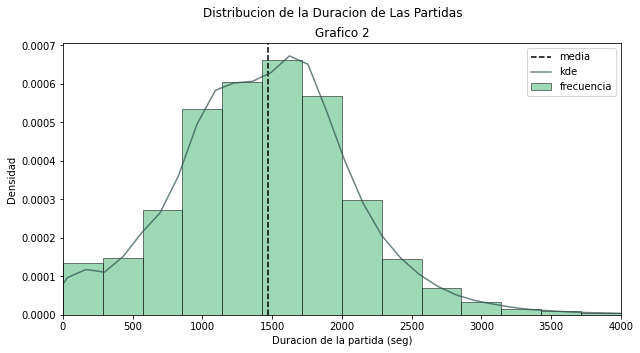

In [ ]:
# Cual es la distribucion de duracion de las partidas

# Se continua el analisis en el mapa elegido anteriormente 

# Operacion auxiliar para pasar de hh:mm:ss a segundos

df_mapa = df[df.map_type_name == mapa]
df_tiempo_procesado = df_mapa['duration'].str.split(':').apply(lambda x: int(x[0]) * 3600 + int(x[1]) * 60 + int(x[2]))

media = np.mean(df_tiempo_procesado)
std = np.std(df_tiempo_procesado)
df_tiempo_procesado

plt.figure(figsize = (10, 5))
plt.axvline(x = media, color = 'k',label="media",linestyle="--")

df_tiempo_procesado.plot(kind = "hist", density = True, range=(0, 4000), bins=14,color="mediumseagreen",edgecolor='black',alpha=0.5,label="frecuencia")
df_tiempo_procesado.plot(kind = "kde",color="darkslategrey",alpha=0.7,label="kde").set_xlim(0, 4000)
plt.suptitle("Distribucion de la Duracion de Las Partidas")
plt.title("Grafico 2")
plt.legend()
plt.xlabel("Duracion de la partida (seg)", fontsize = 10)
plt.ylabel("Densidad", fontsize = 10)

print(f"Tiempo de partida mas alto: {df_tiempo_procesado.max()}")
print(f"Media: {media}")
print(f"Desviacion Estandar: {std}")

Conclusion:

Con este grafico vimos que existen jugadores que no juegan a ganar, si no que se ponen de acuerdo para que la partida dure lo mas posible, de todas formas para esta visualizacion no mostramos dichos outliers
si podemos concluir que el promedio de duracion de una partida es de 25 minutos aproximadamente cpm ima desviacion de 14 minutos, aunque como vimos en clase
hay que ser cuidadoso cuando solo hablamos en funcion de la media y desviacion ya que esto no nos dice mucho de la distribucion

## **Cual es la civilizacion mas usada en determinado pais**

Text(0.5, 0.98, 'civilizaciones mas utilizadas en AR')

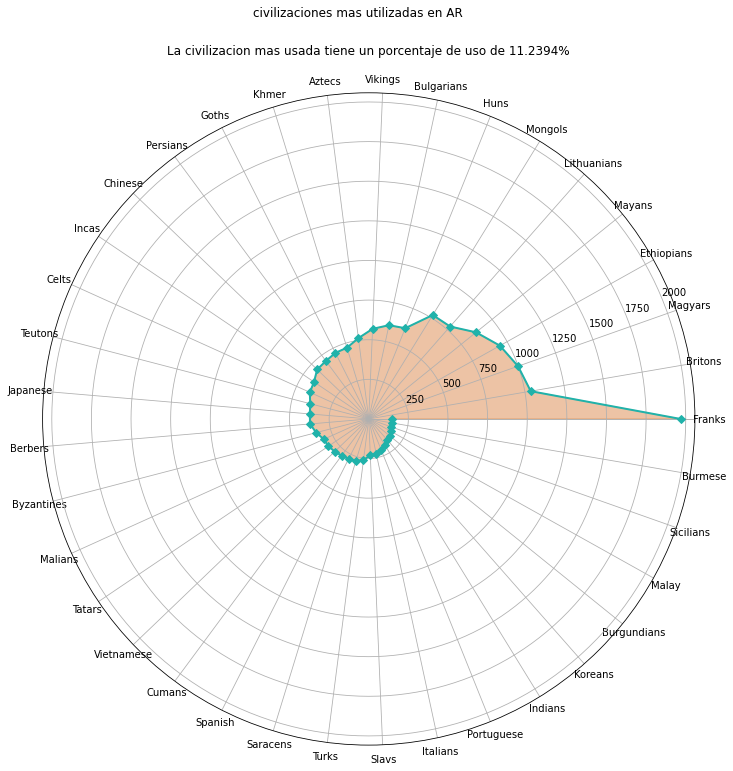

In [ ]:
# Cual es la civilizacion mas usada en determinado pais

#civilizacion = "Huns"
pais = "AR"

df.rename(columns = {'country.lose':'country_lose', 'country.win':'country_win'}, inplace = True)

ganadores =  df["civ_win_name"][df.country_lose == pais]
perdedores = df["civ_lose_name"][df.country_win == pais]

civs = pd.concat([ganadores,perdedores],axis=0)
df_civs_por_pais = civs.value_counts()

civs = df_civs_por_pais.index.tolist()
usos = list(df_civs_por_pais.array)
total = sum(usos)
usos.append(148)

#donde se va a poner cada etiqueta
angulos = np.linspace(start=0, stop=2*np.pi, num=len(civs)+1)


plt.figure(figsize=(12,12))
plt.subplot(polar=True)
#para dibujar esos puntos en los vertices
plt.plot(angulos, usos, marker="D",color="lightseagreen", linewidth=2)
#para pintar el area
plt.fill(angulos, usos, color="chocolate",alpha=0.4)

lines, labels = plt.thetagrids(np.degrees(angulos), labels=civs)
plt.title(f"La civilizacion mas usada tiene un porcentaje de uso de {round(usos[0]/total*100,4)}%")
plt.suptitle(f'civilizaciones mas utilizadas en {pais}')


Conclusion:

Analizamos el caso de las civilizaciones mas usadas dentro de Argentina, aunque el codigo se puede aplicar a otros paises con minimas modificaciones.

Podemos observar una fuerte preferencia por los francos como eleccion a la hora de empezar una partida (>11%), no podemos determinar la causa de esto. Si es debido a causa de una moda popular o si realmente es la mejor eleccion a la hora de empezar una partida. Nos inclinamos a creer la segunda opcion ya que los datos son recopilados de partidas competitivas y no de encuentros casuales.


## **Distribucion del rating de los jugadores en cada pais**

In [ ]:
# Demora alrededor de 57seg
def obtener_rating(jugador, df):
  ganadas = df[df["name_win"] == jugador]
  rating_ganadas = ganadas["rating.win"]

  perdidas = df[df["name_lose"] == jugador]
  rating_perdidas = perdidas["rating.lose"]

  rating = pd.concat([rating_ganadas, rating_perdidas]).to_frame(name = "vals")

  rating.dropna()

  return float(rating.values[-1])

df.rename(columns = {'name.lose':'name_lose', 'name.win':'name_win'}, inplace = True)
df.rename(columns = {'country.lose':'country_lose', 'country.win':'country_win'}, inplace = True)

pais = "AR"

ganadores = df["name_win"][df.country_win == pais]
perdedores = df["name_lose"][df.country_lose == pais]
jugadores = pd.concat([ganadores,perdedores],axis=0)
print(len(jugadores))
jugadores = list(jugadores.unique())
print(len(jugadores))

v = []

for i in jugadores:
  vld = obtener_rating(i, df)
  v.append(vld)

17501
3001


In [ ]:
v_sin_nan = [x for x in v if isnan(x) == False]


Media: 1097.603098487643
Desviacion Estandar: 254.81685869843014


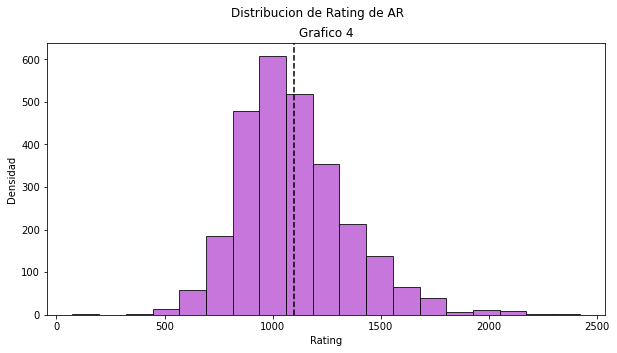

In [ ]:

media, std = norm.fit(v_sin_nan) 


plt.figure(figsize = (10, 5))

plt.axvline(x = media, color = 'k',label="media",linestyle="--")
plt.hist(v_sin_nan, color="mediumorchid",alpha=0.8, bins=19,edgecolor="k")


plt.suptitle(f"Distribucion de Rating de {pais}")
plt.title("Grafico 4")
plt.xlabel("Rating", fontsize = 10)
plt.ylabel("Densidad", fontsize = 10)

print(f"Media: {media}")
print(f"Desviacion Estandar: {std}")


Conclusion:

Aqui queriamos averiguar la distribucion del rating de los jugadores de un determinado pais para poder ver la media y una aproximacion del nivel competitivo de cada pais, para ayudarnos utilizamos una funcion que implementa codigo de entregas posteriores (entrega 2, rating de un jugador)

## **Que mapas son los mas usados en determinado pais**

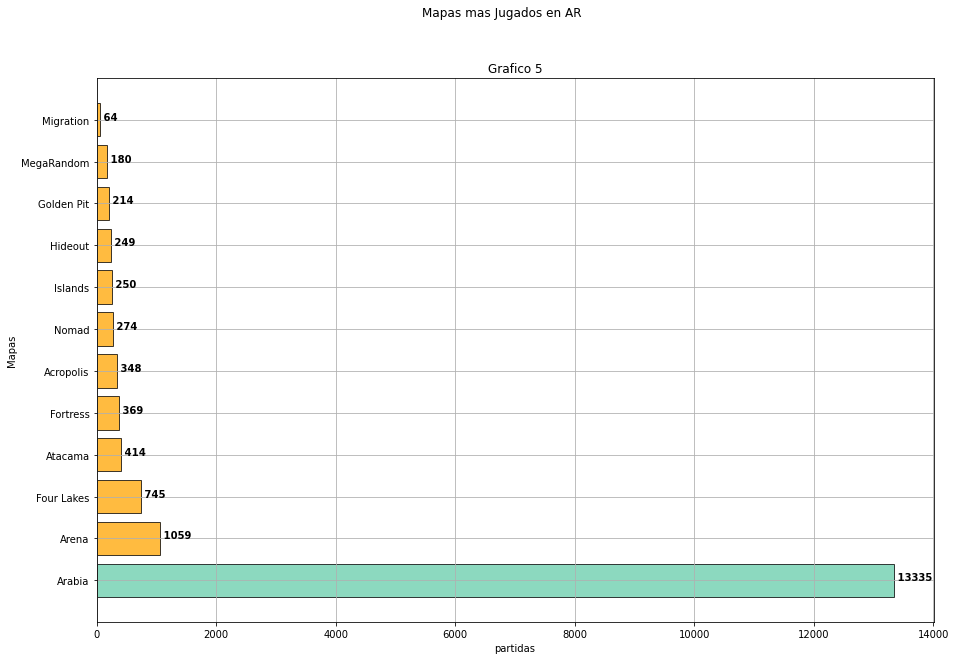

In [ ]:
# Que mapas son los mas usados en determinado pais

pais = "AR"

df.rename(columns = {'country.lose':'country_lose', 'country.win':'country_win'}, inplace = True)
df.rename(columns = {'civ.win.name':'civ_win_name', 'civ.lose.name':'civ_lose_name', 'map_type.name':'map_type_name', 'civ.lose':'civ_lose', 'civ.win':'civ_win'}, inplace = True)

ganadores =  df["map_type_name"][df.country_lose == pais]
perdedores = df["map_type_name"][df.country_win == pais]

mapas = pd.concat([ganadores,perdedores],axis=0)
df_mapas_por_pais = mapas.value_counts()


mapas = df_mapas_por_pais.index.tolist()
usos = list(df_mapas_por_pais.array)


fig , ax= plt.subplots(figsize=(15, 10))
bars = plt.barh(mapas, usos,color="orange",alpha=0.75,edgecolor = "black")
bars[0].set_fc('mediumaquamarine')#pintar la primer barra
bars[0].set_alpha(.75)

#escribir cuantas veces se utilizo cada civilizacion al costado de cada barra
for i, v in enumerate(usos):
    ax.text(v, i, " "+str(v), fontweight='bold')
plt.grid()
plt.xlabel("partidas")
plt.ylabel("Mapas")
plt.suptitle(f"Mapas mas Jugados en {pais}")
plt.title("Grafico 5")
plt.show()

Conclusion:

Podemos observar la popularidad de los mapas mas usados en cada pais, como podemos ver Arabia es el mapa mas elegido para escenarios competitivos por una amplia diferencia. Haciendo una breve investigacion del mapa pudimos observar que es debido a la uniformidad que brinda a la partida ya que es un mapa basico que no otorga ventajas adicionales a ningun bando.